### Task 6
##### Level (Advanced)

#### Exploratory data analysis- SPORTS

### Problem statement
* Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ 
* As a sports analysts, find out the most successful teams, players and factors 
contributing win or loss of a team. 
* Suggest teams or players a company should endorse for its products. 
* You can choose any of the tool of your choice 
(Python/R/Tableau/PowerBI/Excel/SAP/SAS) 


##### Created by Praneeth Kumar

### Let's begin

#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('max_columns',None)

<img src="146973441_1834700243365841_6392991770396285073_n-2.png" width=900 height=200>

#### Read the data

In [2]:
matches=pd.read_csv("matches.csv")
deliver=pd.read_csv('deliveries.csv')

#### Load the data

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliver.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Shape of the data

In [5]:
print("--------Matches shape--------")
print('No of records: ',matches.shape[0])
print('No of variables: ',matches.shape[1])
print('\n------Deliveries-------------')
print('No of records: ',deliver.shape[0])
print('No of variables: ',deliver.shape[1])

--------Matches shape--------
No of records:  756
No of variables:  18

------Deliveries-------------
No of records:  179078
No of variables:  21


#### Check for null values or missing values are present in the data

In [6]:
def miss_values_finder(data):
    df=pd.DataFrame({'Missing_values':data.isnull().sum(),"percentage_of":(data.isnull().sum()/data.shape[0])})
    return df

#### In matches data

In [7]:
miss_values_finder(matches)

,Missing_values,percentage_of
id,0,0.000000
season,0,0.000000
city,7,0.009259
date,0,0.000000
team1,0,0.000000
team2,0,0.000000
toss_winner,0,0.000000
toss_decision,0,0.000000
result,0,0.000000
dl_applied,0,0.000000


#### In deliveries data

In [8]:
miss_values_finder(deliver)

,Missing_values,percentage_of
match_id,0,0.000000
inning,0,0.000000
batting_team,0,0.000000
bowling_team,0,0.000000
over,0,0.000000
ball,0,0.000000
batsman,0,0.000000
non_striker,0,0.000000
bowler,0,0.000000
is_super_over,0,0.000000


As we can see in match data, 'Umpire 3' variable consists of more null values , in the case of deliveries data the columns such as 'player_dismissed','dismissla_kind' and 'filder' has most of the nan values we need to drop those variables and make our data better and clean.

#### Drop the missing values

In [9]:
def drop_variable(variable,data):
    return data.drop(columns=[variable],axis=1,inplace=True)

In [10]:
drop_variable('umpire3',matches)

In [11]:
for i in ['player_dismissed','dismissal_kind','fielder']:
    drop_variable(i,deliver)

In [12]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

#### Replace the team names with thier abbrevations

In [13]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant','Delhi Capitals'],['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS','DD'],inplace=True)
deliver.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant','Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS','DD'],inplace=True)

#### Some basic analysis

In [14]:
print('Total matches played: ',matches.shape[0])
print('----\nVenues: ',matches['city'].unique())
print('-----\nTeams in ipl: ',matches['team1'].unique())

Total matches played:  756
----
Venues:  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
-----
Teams in ipl:  ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


In [15]:
print('Total venues played at: ',matches['city'].nunique())
print('Toss decisions made by the players: ',list(matches['toss_decision'].unique()))
print('Total umpires: ',matches['umpire1'].nunique())

Total venues played at:  32
Toss decisions made by the players:  ['field', 'bat']
Total umpires:  61


In [16]:
print('Man of the match awards: ',matches['player_of_match'].value_counts().idxmax())
print('Most winning team in ipl %s and wins %d' % (matches['winner'].value_counts().idxmax(),matches['winner'].value_counts().max()))

Man of the match awards:  CH Gayle
Most winning team in ipl MI and wins 109


In [17]:
fg=matches.iloc[[matches['win_by_runs'].idxmax()]]
fg[['season','city','team1','team2','result','winner','player_of_match','venue','win_by_runs']]

,season,city,team1,team2,result,winner,player_of_match,venue,win_by_runs
43,2017,Delhi,MI,DD,normal,MI,LMP Simmons,Feroz Shah Kotla,146


The team mumbai indians beats delhi daredevils with the runs of 146 at Delhi

In [18]:
vk=matches.iloc[[matches['win_by_wickets'].idxmax()]]
vk[['season','city','team1','team2','result','winner','win_by_wickets','player_of_match']]

,season,city,team1,team2,result,winner,win_by_wickets,player_of_match
2,2017,Rajkot,GL,KKR,normal,KKR,10,CA Lynn


KKR win by 10 wickets with Gujarath lions

In [19]:
print('Toss decisions\n',matches['toss_decision'].value_counts()/matches.shape[0]*100)

Toss decisions
 field    61.243386
bat      38.756614
Name: toss_decision, dtype: float64


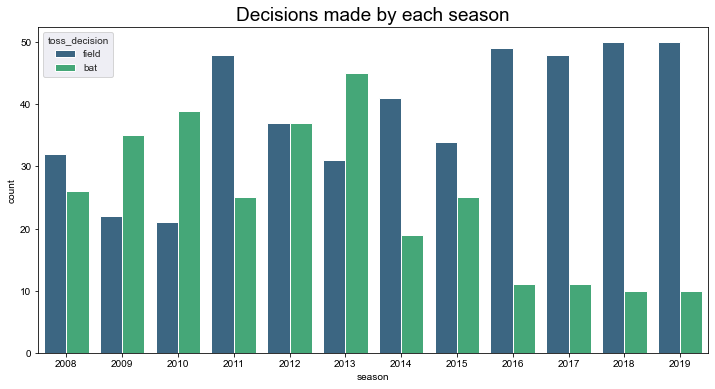

In [22]:
plt.subplots(figsize=(12,6))
sns.set_style('darkgrid')
sns.countplot(x='season',hue='toss_decision',data=matches,palette='viridis')
plt.title('Decisions made by each season',fontsize=19)
plt.show()

The decision for batting and fielding is varies largely across the seasons. In 2009,2010,2013 the probability of toss winner opted for bat first while in the seasons 2016-2019 the majority of the toss winner opted for field first.

In [23]:
matches['toss_winner'].value_counts()

MI      98
KKR     92
DD      90
CSK     89
RCB     81
KXIP    81
RR      80
SRH     46
DC      43
PW      20
GL      15
RPS     13
KTK      8
Name: toss_winner, dtype: int64

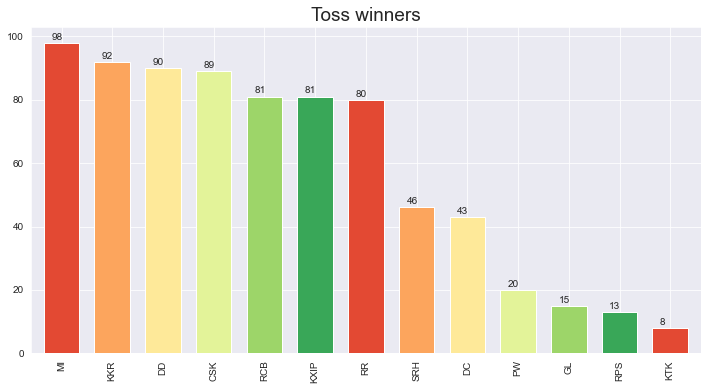

In [24]:
plt.subplots(figsize=(12,6))
ax=matches['toss_winner'].value_counts().plot.bar(color=sns.color_palette('RdYlGn'),width=0.70)
for g in ax.patches:
    ax.annotate(format(g.get_height()),(g.get_x()+0.15, g.get_height()+ 1))
    plt.title('Toss winners',fontsize=19)
    
plt.show()

Mumbai indians has more luck to win the toss and choose to field or bat while in pune warriors the toss winner is comparitively low.

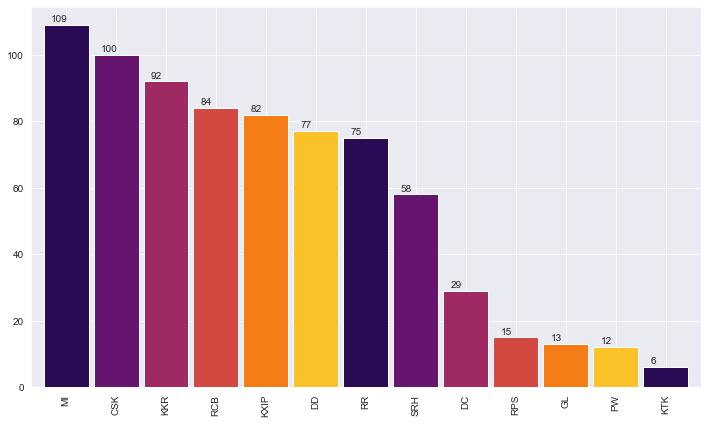

In [25]:
plt.subplots(figsize=(12,7))
ax=matches['winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('inferno'))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+ 0.15, p.get_height() + 1))

The win rate of the mumbai indians in the Indian premiur league is comparatively higher than the other teams.

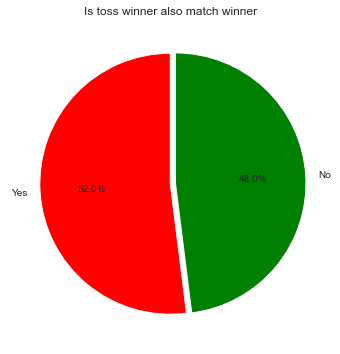

In [26]:
df=matches[matches['toss_winner'] == matches['winner']]
slic=[len(df),(matches.shape[0]-len(df))]
labels=['Yes','No']
plt.pie(slic,labels=labels,startangle=90,colors=['r','g'],explode=(0,0.04),autopct='%1.1f%%')
plt.title('Is toss winner also match winner')
figure=plt.gcf()
figure.set_size_inches(6,6)
plt.show()

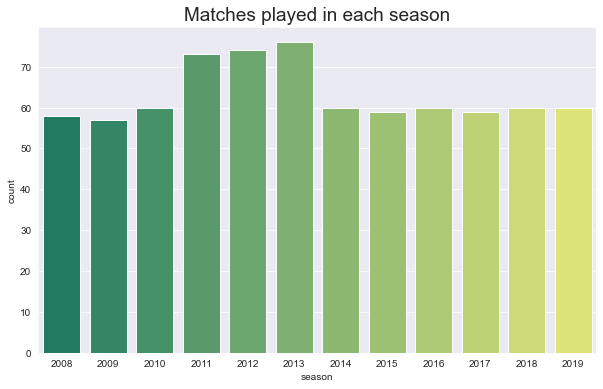

In [27]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette='summer')
plt.title('Matches played in each season',fontsize=19)
plt.show()

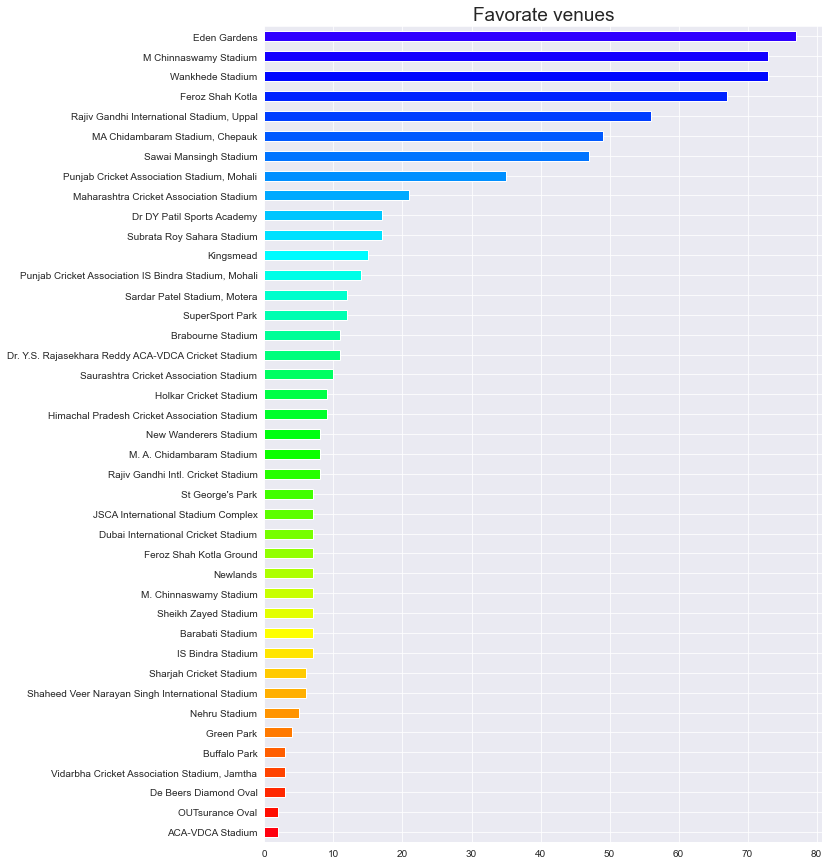

In [28]:
plt.figure(figsize=(10,15))
ax=matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=0.5,color=sns.color_palette('gist_rainbow',50))
ax.set_title('Favorate venues',fontsize=19)
plt.show()

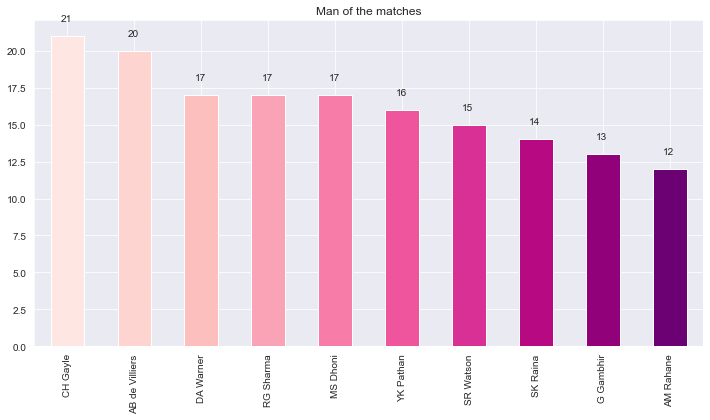

In [29]:
plt.subplots(figsize=(12,6))
ax=matches['player_of_match'].value_counts().head(10).plot.bar(color=sns.color_palette('RdPu',10))
for k in ax.patches:
    ax.annotate(format(k.get_height()),(k.get_x() + 0.15, k.get_height() + 1))
    plt.title('Man of the matches')
plt.show()

In [30]:
print('Winners By Years')
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)

Winners By Years
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


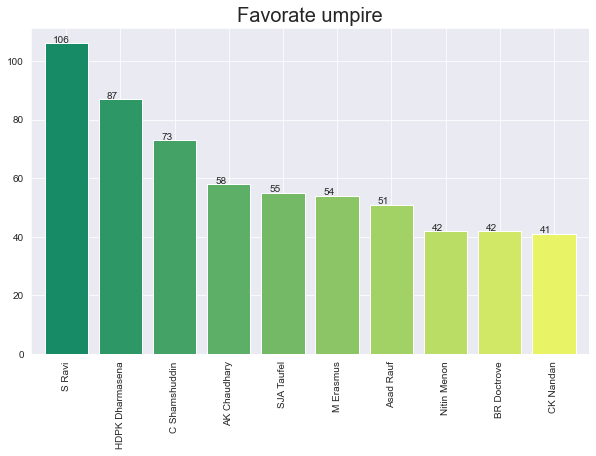

In [31]:
plt.subplots(figsize=(10,6))
ump=pd.concat([matches['umpire1'],matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
    plt.title('Favorate umpire',fontsize=20)
plt.show()

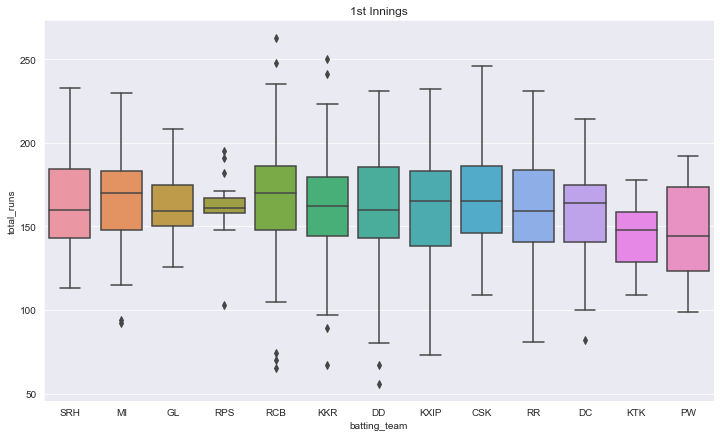

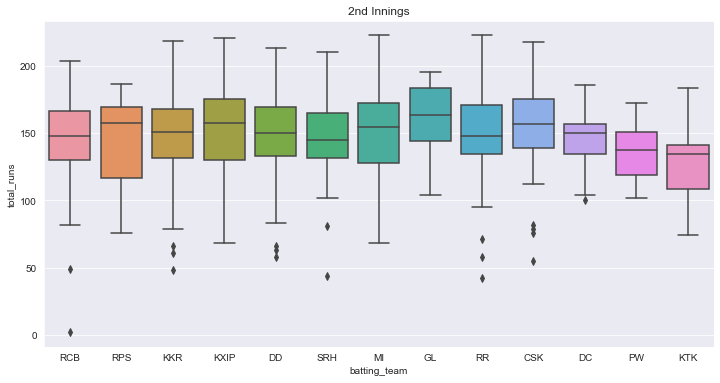

In [39]:
plt.subplots(figsize=(12,7))
df=deliver.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
df.drop('match_id',axis=1,inplace=True)
df.sort_values(ascending=False,by=['batting_team','total_runs'])
score_1_innings=df[df['inning'] == 1]
score_2_innings=df[df['inning'] == 2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_innings).set_title('1st Innings')
plt.show()
sns.boxplot(x='batting_team',y='total_runs',data=score_2_innings).set_title('2nd Innings')
fig=plt.gcf()
fig.set_size_inches(12,6)

In [40]:
#High scores 200+
high_score=deliver.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_score.drop('match_id',1,inplace=True)
high_score=high_score[high_score['total_runs'] >= 200]
high_score.nlargest(10,'total_runs')

,inning,batting_team,bowling_team,total_runs
829,1,RCB,PW,263
1370,1,KKR,KXIP,250
1250,1,RCB,GL,248
416,1,CSK,RR,246
1498,1,KKR,MI,241
122,1,CSK,KXIP,240
1134,1,RCB,MI,235
1426,1,SRH,RCB,233
596,1,KXIP,RCB,232
1500,1,SRH,KXIP,232


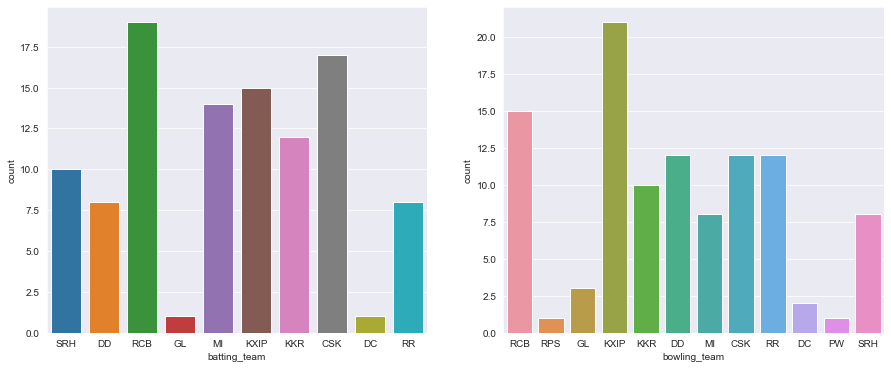

In [41]:
#High scores batting team and bowling team
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(high_score['batting_team'],ax=ax[0])
sns.countplot(high_score['bowling_team'],ax=ax[1])
plt.gca()
plt.show()

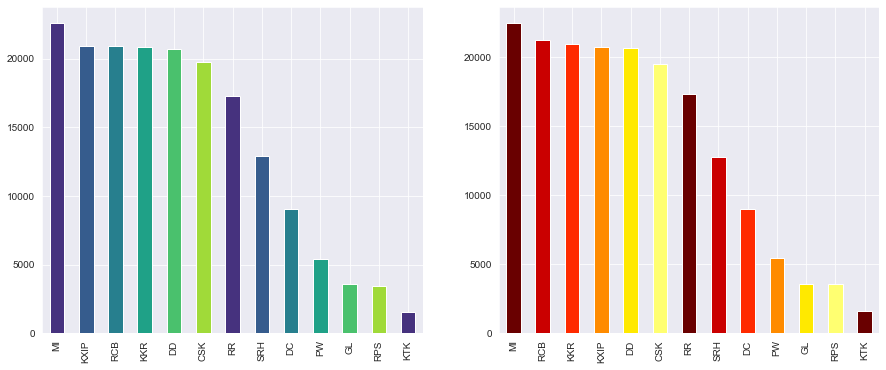

In [42]:
#Batting team and bowling team
fig,ax=plt.subplots(1,2,figsize=(15,6))
deliver['batting_team'].value_counts().plot.bar(ax=ax[0],color=sns.color_palette('viridis'))
deliver['bowling_team'].value_counts().plot.bar(ax=ax[1],color=sns.color_palette('hot'))
plt.show()

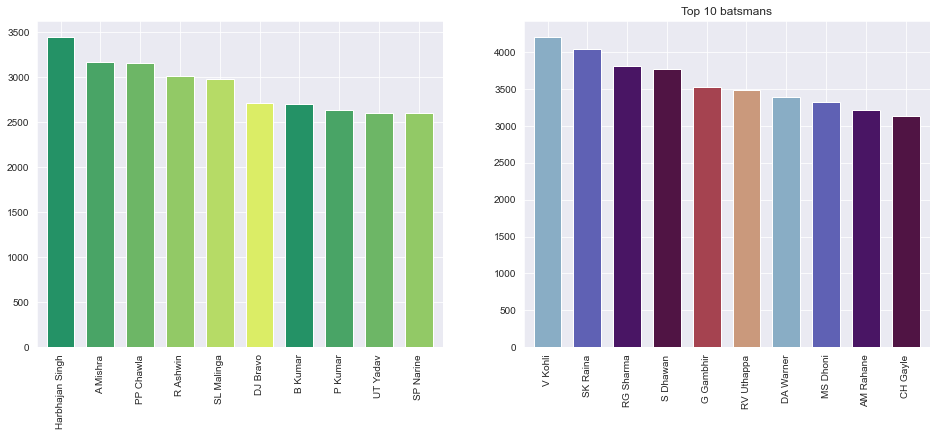

In [57]:
#Top 10 batsmans and bowlers
fig,ax=plt.subplots(1,2,figsize=(16,6))
deliver['bowler'].value_counts().head(10).plot.bar(width=0.7,color=sns.color_palette('summer'),ax=ax[0])
plt.title('Top 10 Bowlers')
deliver['batsman'].value_counts().head(10).plot.bar(width=0.7,color=sns.color_palette('twilight'),ax=ax[1])
plt.title("Top 10 batsmans")
plt.show()

In [43]:
print("Best batsman: ",deliver['batsman'].value_counts().idxmax())
print("Best Bowler: ",deliver['bowler'].value_counts().idxmax())

Best batsman:  V Kohli
Best Bowler:  Harbhajan Singh


In [44]:
#Individual scores of the players
top_score=deliver.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
top_score.sort_values(by='batsman_runs',ascending=False)
top_score.nlargest(10,'batsman_runs')[['batsman','batsman_runs']]

,batsman,batsman_runs
6200,CH Gayle,175
900,BB McCullum,158
8426,AB de Villiers,133
10149,RR Pant,130
9257,AB de Villiers,129
5585,CH Gayle,128
3135,M Vijay,127
529,DA Warner,126
7752,V Sehwag,122
10417,SR Watson,121


Out of these scores the Ch Gayle performed better in the IPL League.

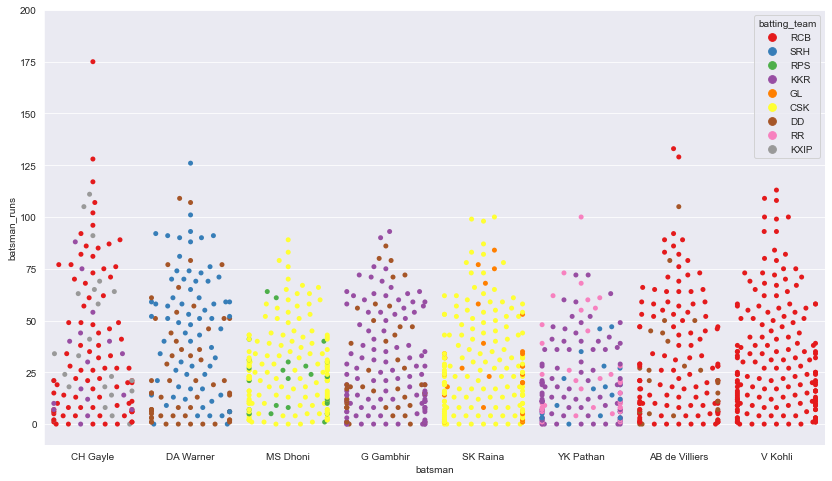

In [45]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = deliver.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_score['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.ylim(-10,200)
plt.show()

These plot represents the batsman such as 'Gayle','DA Warner','Sk raina','AB de Villiers' and 'V kohli' scored century and players who missed the century 'Ms Dhoni' and 'G Gambhir'

#### Questions

* As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team ?

The Team Mumbai indians is well perform in all matches also in most of the matches toss winner as compared to the other teams also it is one of the succesfull teams of the ipl also the team such as 'CSK','KKR','RCB' is also most succesfull teams.
The best player who is well performed and scored max score is 'Virat Kohli' and the player who is individual score is higher then nominal is 'Gayle'. The winning rate of the Mumbai indians is comparatively higher.

* Suggest teams or players a company should endorse for its products.

The teams known as 'MI','CSK','KKR','RCB' as well suggested teams in the ipl history based on their activity and performance in all the criteria.
The player 'Virat Kohli','Ch Gayle','BB McCullam','Harbajan singh' are goog players based on their performances.

### Thank you :)